In [36]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
%matplotlib inline
# plt.style.use("ggplot")
sns.set_style("darkgrid")

In [37]:
taxi_data = pd.read_csv("../../clean_data/FinalData_for_Models.csv")

In [38]:
taxi_data.shape

(30647, 21)

In [39]:
taxi_data.rename(columns={'Unnamed: 0':'pickup_time'}, inplace=True)

In [40]:
taxi_data = taxi_data.loc[taxi_data["missing_dt"]==False, :]

In [41]:
taxi_data.shape

(30647, 21)

In [42]:
taxi_data.head()

,pickup_time,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,...,Passengers,Month,Hour,Day,holiday,precip_in,Avg_Delay_Arriving,Avg_Delay_Departing,Cancelled_Arriving_Flights,Cancelled_Departing_Flights
0,2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,...,108.0,1,0,2,True,0.0,0.0,0.0,0.0,0.0
1,2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,...,0.0,1,1,2,True,0.0,0.0,0.0,0.0,0.0
2,2014-01-01 02:00:00-05:00,34.0,70.0,False,268.48,266.48,270.37,57.0,3.0,clear,...,0.0,1,2,2,True,0.0,0.0,0.0,0.0,0.0
3,2014-01-01 03:00:00-05:00,12.0,18.0,False,268.33,265.93,270.37,80.0,3.0,clear,...,0.0,1,3,2,True,0.0,291.0,0.0,0.0,0.0
4,2014-01-01 04:00:00-05:00,25.0,37.0,False,268.10,265.37,270.37,80.0,3.0,clear,...,0.0,1,4,2,True,0.0,0.0,0.0,0.0,0.0


In [43]:
# names = cal.holidays(return_name = True)
# data = pd.concat([taxi_data, names], axis=1, join_axes=[taxi_data.tpep_pickup_datetime])

## Exploratory Data Analysis

### How many trips on Holiday vs Non-Holiday days

In [44]:
taxi_data.holiday.value_counts(), taxi_data.holiday.value_counts(normalize=True)

(False    29831
 True       816
 Name: holiday, dtype: int64, False    0.973374
 True     0.026626
 Name: holiday, dtype: float64)

97% of the pickups belong to non-Holiday days while 3% during Holiday dates.

In [45]:
count_per_hour = taxi_data.groupby(['holiday','Hour']).num_pickups.mean()

In [46]:
count_df = count_per_hour.unstack(level=0)

In [47]:
# count_df["Normal Days"] = count_df[False]/29831
# count_df["Federal Holidays"] = count_df[True]/816

In [48]:
count_df["Normal Days"] = count_df[False]
count_df["Federal Holidays"] = count_df[True]

In [49]:
count_df.head()

holiday,False,True,Normal Days,Federal Holidays
Hour,,,,
0,255.371681,190.676471,255.371681,190.676471
1,58.731942,26.647059,58.731942,26.647059
2,14.876513,7.500000,14.876513,7.500000
3,4.540628,5.264706,4.540628,5.264706
4,7.484312,8.058824,7.484312,8.058824


([<matplotlib.axis.XTick at 0x11ed81c50>,
 <a list of 24 Text xticklabel objects>)

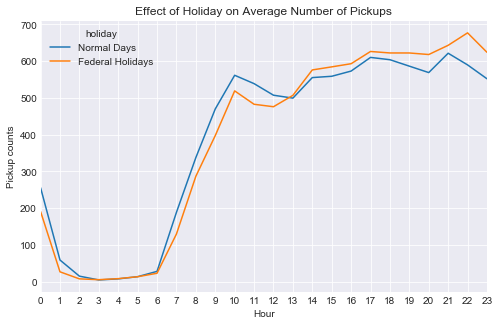

In [52]:
count_df[["Normal Days", "Federal Holidays"]].plot(figsize=(8,5),kind="line", title = "Effect of Holiday on Average Number of Pickups")
plt.ylabel("Pickup counts")
plt.xticks(range(24))

In [18]:
names = calendar().holidays()

In [19]:
holiday_names = pd.DataFrame(names)

In [20]:
holiday_names

,0
0,1970-01-01
1,1970-02-16
2,1970-05-25
3,1970-07-03
4,1970-09-07
5,1970-10-12
6,1970-11-11
7,1970-11-26
8,1970-12-25
9,1971-01-01


In [55]:
holiday_names=holiday_names.rename(columns={'':'date', '0':'name'}, inplace=True)

AttributeError: 'NoneType' object has no attribute 'rename'

In [56]:
holiday_names

In [22]:
cal = calendar()
holidays = cal.holidays()

DatetimeIndex(['1970-01-01', '1970-02-16', '1970-05-25', '1970-07-03',
               '1970-09-07', '1970-10-12', '1970-11-11', '1970-11-26',
               '1970-12-25', '1971-01-01',
               ...
               '2030-01-01', '2030-01-21', '2030-02-18', '2030-05-27',
               '2030-07-04', '2030-09-02', '2030-10-14', '2030-11-11',
               '2030-11-28', '2030-12-25'],
              dtype='datetime64[ns]', length=594, freq=None)